In [4]:
import pandas as pd
df = pd.read_csv("churn_data.csv")


Dataset Loaded

In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv("churn_data.csv")

# Show first few rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


EDA(Exploratory Data Analysis)

Check Dataset Shape & Info

In [6]:
# Shape of the dataset
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

# Info about each column
df.info()


Rows: 7043
Columns: 21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7

Check for Missing Values

In [7]:
# Count missing values per column
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Look at Target Variable ("Churn")

In [8]:
# Distribution of Churn (Yes/No)
df['Churn'].value_counts()
df['Churn'].value_counts(normalize=True) * 100  # Percentage


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

Visualize Target Distribution

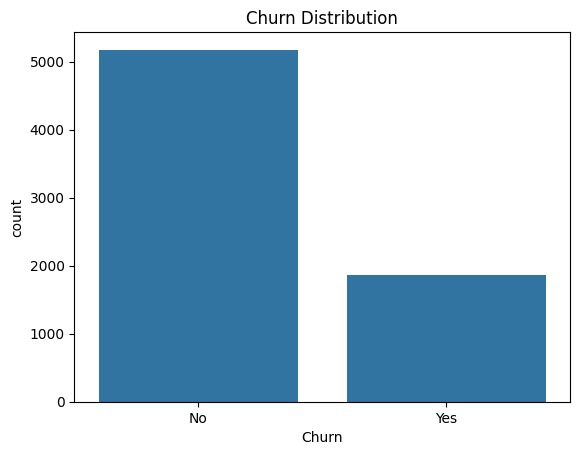

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


Data Cleaning & Preprocessing

Convert TotalCharges to numeric

In [10]:
# Convert TotalCharges to numeric just to be sure
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check type
df.dtypes['TotalCharges']


dtype('float64')

Drop Unnecessary Columns

In [11]:
df.drop(['customerID'], axis=1, inplace=True)


Convert Categorical Columns to Numeric

In [12]:
from sklearn.preprocessing import LabelEncoder

# Encode binary columns (Yes/No, Male/Female)
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])


In [13]:
df = pd.get_dummies(df, drop_first=True)


Split Data into Train/Test Sets

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)  # Features
y = df['Churn']               # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
print("Logistic Regression Evaluation:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [16]:
# Check if there are any missing values in the features
X_train.isnull().sum().sort_values(ascending=False).head(10)


TotalCharges                      10
gender                             0
Partner                            0
Dependents                         0
tenure                             0
SeniorCitizen                      0
PhoneService                       0
PaperlessBilling                   0
MonthlyCharges                     0
MultipleLines_No phone service     0
dtype: int64

In [17]:
# Count total missing values
X_train.isnull().sum().sum(), X_test.isnull().sum().sum()


(np.int64(10), np.int64(1))

In [18]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Keep labels aligned

X_test = X_test.dropna()
y_test = y_test[X_test.index]


In [19]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


Model Training & Evaluation

Train Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
print("Logistic Regression Evaluation:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Evaluation:
[[933 102]
 [149 224]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1035
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1408
   macro avg       0.77      0.75      0.76      1408
weighted avg       0.82      0.82      0.82      1408



Train Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Train
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
print("Decision Tree Evaluation:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Evaluation:
[[842 193]
 [196 177]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1035
           1       0.48      0.47      0.48       373

    accuracy                           0.72      1408
   macro avg       0.64      0.64      0.64      1408
weighted avg       0.72      0.72      0.72      1408



Visualize Confusion Matrix

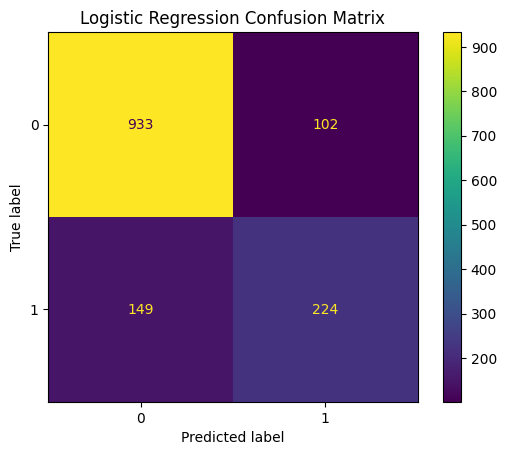

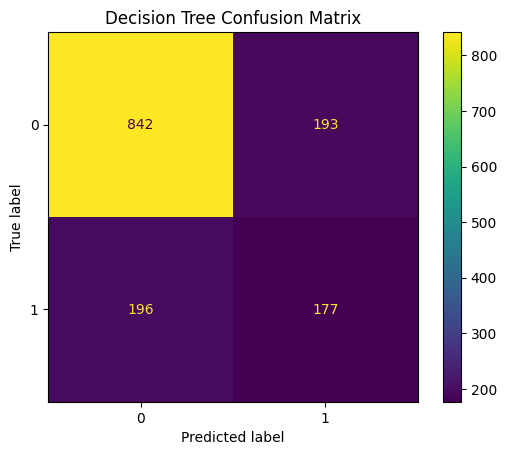

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot for Logistic Regression
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Plot for Decision Tree
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test)
plt.title("Decision Tree Confusion Matrix")
plt.show()


Handle Class Imbalance with SMOTE

Apply SMOTE to Training Data

In [23]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training set only
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Check new class distribution
print(y_train.value_counts())     # Before
print(y_train_sm.value_counts())  # After


Churn
0    4128
1    1496
Name: count, dtype: int64
Churn
0    4128
1    4128
Name: count, dtype: int64


In [25]:
# Logistic Regression on SMOTE data
lr_model_sm = LogisticRegression(max_iter=1000)
lr_model_sm.fit(X_train_sm, y_train_sm)
y_pred_lr_sm = lr_model_sm.predict(X_test)

print("Logistic Regression with SMOTE:")
print(classification_report(y_test, y_pred_lr_sm))


Logistic Regression with SMOTE:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1035
           1       0.56      0.69      0.62       373

    accuracy                           0.77      1408
   macro avg       0.72      0.75      0.73      1408
weighted avg       0.79      0.77      0.78      1408



c:\Users\KIIT0001\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Only scale features (not labels!)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now apply SMOTE to scaled training data
X_train_sm_scaled, y_train_sm = sm.fit_resample(X_train_scaled, y_train)



Retrain Models on SMOTE Data

In [27]:
lr_model_scaled = LogisticRegression(max_iter=2000)
lr_model_scaled.fit(X_train_sm_scaled, y_train_sm)
y_pred_scaled = lr_model_scaled.predict(X_test_scaled)

print(classification_report(y_test, y_pred_scaled))


              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1035
           1       0.52      0.83      0.64       373

    accuracy                           0.75      1408
   macro avg       0.72      0.78      0.73      1408
weighted avg       0.82      0.75      0.77      1408



Feature Importance

Logistic Regression Feature Importance

In [28]:
# Get feature names (from the original X)
feature_names = X.columns

# Get model coefficients
coefficients = lr_model_scaled.coef_[0]

# Create DataFrame of features and their importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

# Sort by absolute importance
importance_df['AbsImportance'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values('AbsImportance', ascending=False)

# Display top features
importance_df.head(10)


,Feature,Importance,AbsImportance
4,tenure,-1.685057,1.685057
7,MonthlyCharges,-1.089194,1.089194
8,TotalCharges,1.033195,1.033195
11,InternetService_Fiber optic,0.769187,0.769187
26,Contract_Two year,-0.679805,0.679805
24,StreamingMovies_Yes,0.314626,0.314626
25,Contract_One year,-0.286773,0.286773
22,StreamingTV_Yes,0.232943,0.232943
6,PaperlessBilling,0.211181,0.211181
10,MultipleLines_Yes,0.171797,0.171797


Visualize Top Features

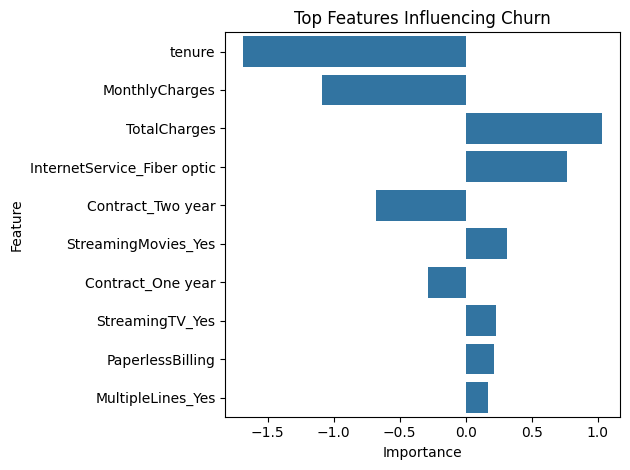

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

top_n = 10

sns.barplot(x='Importance', y='Feature', data=importance_df.head(top_n))
plt.title("Top Features Influencing Churn")
plt.tight_layout()
plt.show()
